In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE
from large_gcs.cost_estimators.factored_collision_free_ce import FactoredCollisionFreeCE


import numpy as np
from copy import deepcopy
from IPython.display import HTML, display



np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
# logging.getLogger().setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)

In [2]:
cg = ContactGraph.load_from_file(ContactGraphGeneratorParams.graph_file_path_from_name("cg_maze_a2"))

INFO:large_gcs.graph.contact_graph:Loading 35 contact pair modes for 4 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 836 sets...
100%|██████████| 836/836 [00:11<00:00, 75.08it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 838/838 [00:00<00:00, 8969.64it/s]
INFO:large_gcs.graph.graph:Adding 838 vertices to graph...
100%|██████████| 838/838 [00:00<00:00, 10391.09it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 53586/53586 [00:06<00:00, 8825.23it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 53586/53586 [00:12<00:00, 4359.56it/s]
INFO:large_gcs.graph.graph:Adding 53586 edges to graph...
100%|██████████| 53586/53586 [00:14<00:00, 3585.11it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 18), n_vertices=838, n_edges=53586, source=[array([1.600, 0.600]), array([3.250, 0.000])], target=[array([-2.300, -0.700]), array([-0.500

In [3]:
cost_estimator = FactoredCollisionFreeCE(cg)

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 18/18 [00:00<00:00, 18477.11it/s]
INFO:large_gcs.graph.graph:Adding 18 vertices to graph...
100%|██████████| 18/18 [00:00<00:00, 18636.75it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
100%|██████████| 153/153 [00:02<00:00, 51.46it/s]
INFO:large_gcs.graph.contact_graph:222 edges generated
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 222/222 [00:00<00:00, 18848.90it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 222/222 [00:00<00:00, 8545.43it/s]
INFO:large_gcs.graph.graph:Adding 222 edges to graph...
100%|██████████| 222/222 [00:00<00:00, 6947.68it/s]
INFO:large_gcs.graph.factored_collision_free_graph:Created factored collision free graph for obj0: GraphParams(dim_bounds=(2, 4), n_vertices=18, n_edges=222, source=None, target=[array([-2.300, -0.700])], workspace=array([[-5,  5],
       [-5,  5]]), default_costs_constraint

["('NC|obs0_f0-obj0_v3', 'NC|obs1_f0-obj0_v3')",
 "('NC|obs0_f0-obj0_v3', 'NC|obs1_f1-obj0_v0')",
 "('NC|obs0_f0-obj0_v3', 'NC|obs1_f2-obj0_v1')",
 "('NC|obs0_f0-obj0_v3', 'IC|obs1_v0-obj0_f1')",
 "('NC|obs0_f0-obj0_v3', 'IC|obs1_v0-obj0_f2')",
 "('NC|obs0_f0-obj0_v3', 'IC|obs1_v1-obj0_f3')",
 "('NC|obs0_f0-obj0_v3', 'IC|obs1_v2-obj0_f0')",
 "('NC|obs0_f1-obj0_v1', 'NC|obs1_f1-obj0_v0')",
 "('NC|obs0_f1-obj0_v1', 'NC|obs1_f2-obj0_v1')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs1_f0-obj0_v3')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs1_f2-obj0_v1')",
 "('IC|obs0_v0-obj0_f1', 'NC|obs1_f2-obj0_v1')",
 "('IC|obs0_v0-obj0_f2', 'NC|obs1_f2-obj0_v1')",
 "('IC|obs0_v1-obj0_f0', 'NC|obs1_f1-obj0_v0')",
 "('IC|obs0_v1-obj0_f0', 'NC|obs1_f2-obj0_v1')",
 "('IC|obs0_v1-obj0_f3', 'NC|obs1_f1-obj0_v0')",
 "('IC|obs0_v1-obj0_f3', 'NC|obs1_f2-obj0_v1')",
 'target']

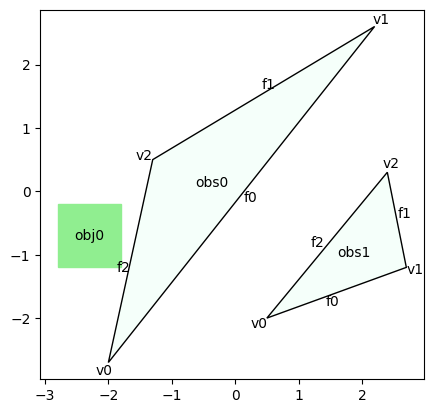

In [4]:
fcfg = cost_estimator._collision_free_graphs[0]
fcfg.plot()
fcfg.vertex_names
# 

In [5]:
# fcfg.set_source(fcfg.vertex_names[1])
# sol = fcfg.solve()
# anim = fcfg.animate_solution()
# HTML(anim.to_html5_video())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpssl1or6w/temp.m4v


Reaching target from ('NC|obs0_f0-obj0_v3', 'NC|obs1_f0-obj0_v3') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp11fv8rsn/temp.m4v


Reaching target from ('NC|obs0_f0-obj0_v3', 'NC|obs1_f1-obj0_v0') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpi_51p8oc/temp.m4v


Reaching target from ('NC|obs0_f0-obj0_v3', 'NC|obs1_f2-obj0_v1') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp67grfihe/temp.m4v


Reaching target from ('NC|obs0_f0-obj0_v3', 'IC|obs1_v0-obj0_f1') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp4v_9k9jg/temp.m4v


Reaching target from ('NC|obs0_f0-obj0_v3', 'IC|obs1_v0-obj0_f2') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmph1qx_rty/temp.m4v


Reaching target from ('NC|obs0_f0-obj0_v3', 'IC|obs1_v1-obj0_f3') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpbmd92nnc/temp.m4v


Reaching target from ('NC|obs0_f0-obj0_v3', 'IC|obs1_v2-obj0_f0') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpmss9euvr/temp.m4v


Reaching target from ('NC|obs0_f1-obj0_v1', 'NC|obs1_f1-obj0_v0') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpc1rd70c6/temp.m4v


Reaching target from ('NC|obs0_f1-obj0_v1', 'NC|obs1_f2-obj0_v1') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpn52thwuz/temp.m4v


Reaching target from ('NC|obs0_f2-obj0_v1', 'NC|obs1_f0-obj0_v3') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmph5athqeg/temp.m4v


Reaching target from ('NC|obs0_f2-obj0_v1', 'NC|obs1_f2-obj0_v1') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpnxdev0zq/temp.m4v


Reaching target from ('IC|obs0_v0-obj0_f1', 'NC|obs1_f2-obj0_v1') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp00ntwwpt/temp.m4v


Reaching target from ('IC|obs0_v0-obj0_f2', 'NC|obs1_f2-obj0_v1') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpp7ssl2oh/temp.m4v


Reaching target from ('IC|obs0_v1-obj0_f0', 'NC|obs1_f1-obj0_v0') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpvz56stfh/temp.m4v


Reaching target from ('IC|obs0_v1-obj0_f0', 'NC|obs1_f2-obj0_v1') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpv42r8a22/temp.m4v


Reaching target from ('IC|obs0_v1-obj0_f3', 'NC|obs1_f1-obj0_v0') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp96sxv4wl/temp.m4v


Reaching target from ('IC|obs0_v1-obj0_f3', 'NC|obs1_f2-obj0_v1') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp8kplw9hz/temp.m4v


Reaching target from ('NC|obs0_f0-rob0_v1', 'NC|obs1_f0-rob0_v1') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpxxk5ak70/temp.m4v


Reaching target from ('NC|obs0_f0-rob0_v1', 'NC|obs1_f1-rob0_v2') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpzp112slg/temp.m4v


Reaching target from ('NC|obs0_f0-rob0_v1', 'NC|obs1_f2-rob0_v0') succeeded: True


Reaching target from ('NC|obs0_f1-rob0_v0', 'NC|obs1_f1-rob0_v2') succeeded: True


/Users/chewchiashaoyuan/Documents/Software/large_gcs/large_gcs/graph/contact_graph.py:495: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp1jwwuo4y/temp.m4v


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp7jgssh51/temp.m4v


Reaching target from ('NC|obs0_f1-rob0_v0', 'NC|obs1_f2-rob0_v0') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmptjr9rn7p/temp.m4v


Reaching target from ('NC|obs0_f2-rob0_v0', 'NC|obs1_f0-rob0_v1') succeeded: True


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmpfcvc6v96/temp.m4v


Reaching target from ('NC|obs0_f2-rob0_v0', 'NC|obs1_f2-rob0_v0') succeeded: True


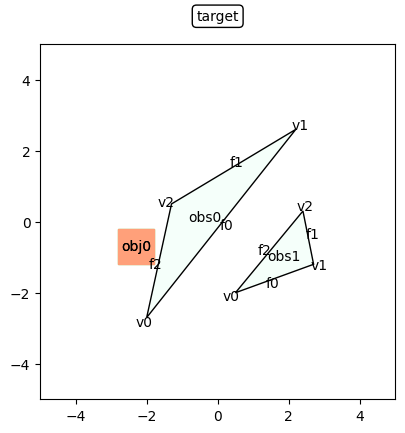

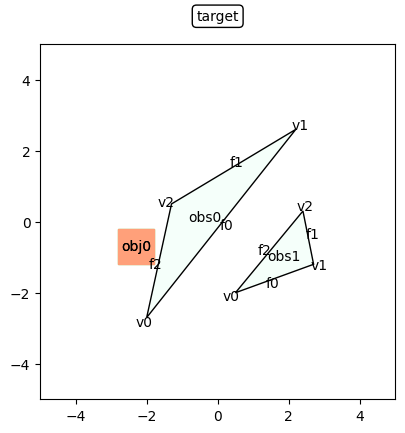

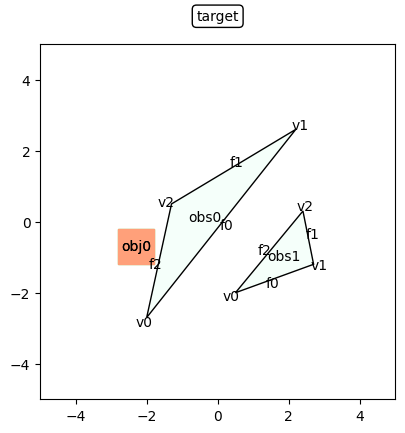

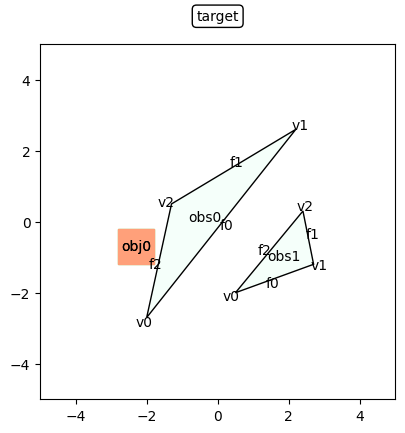

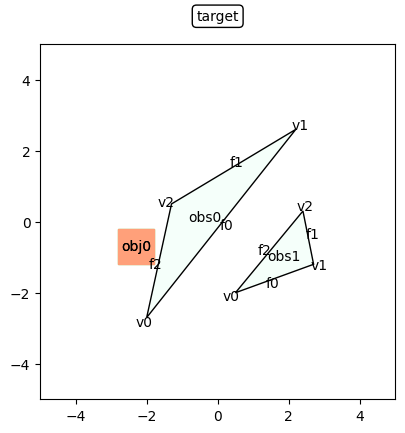

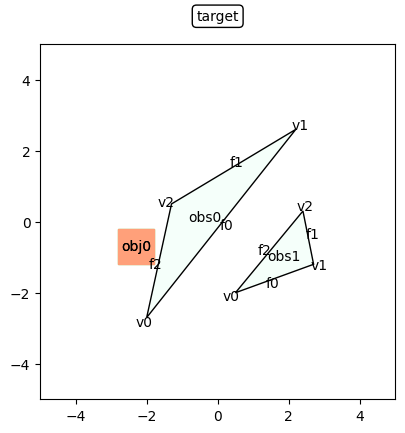

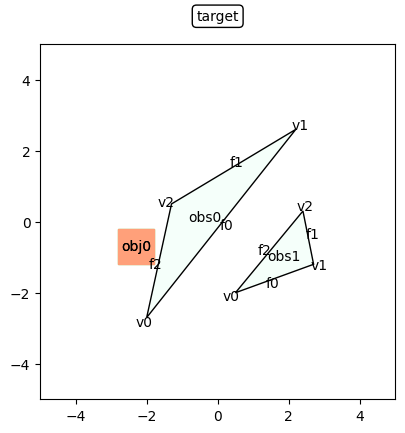

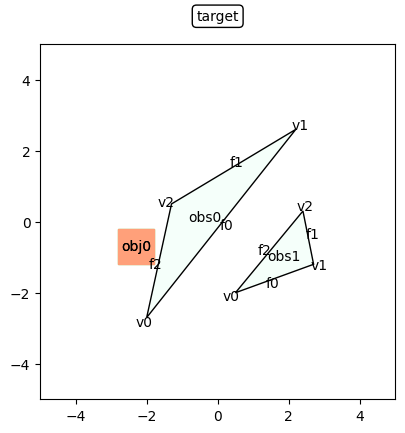

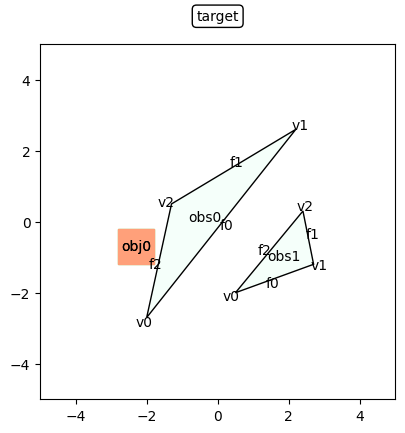

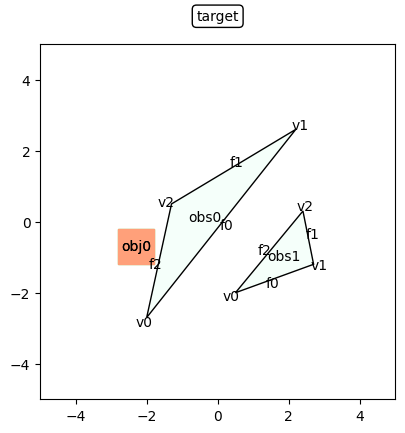

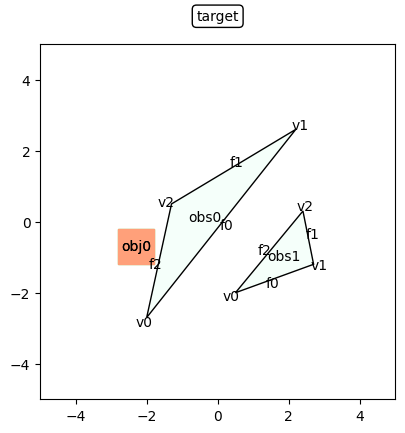

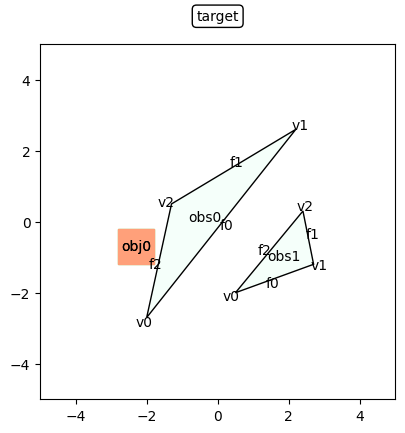

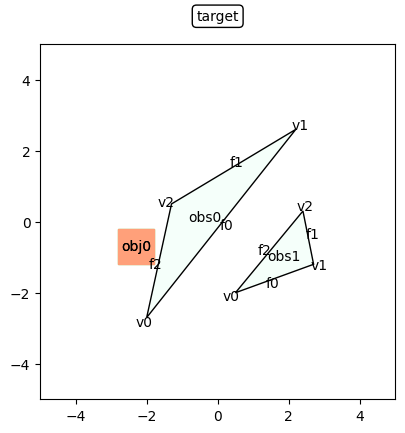

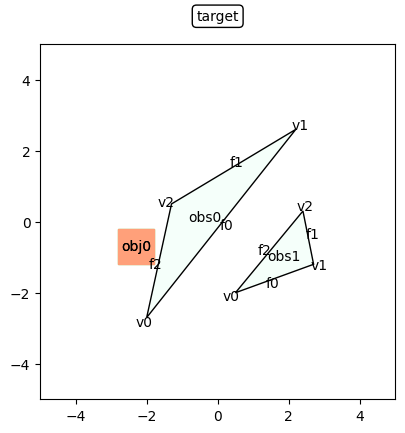

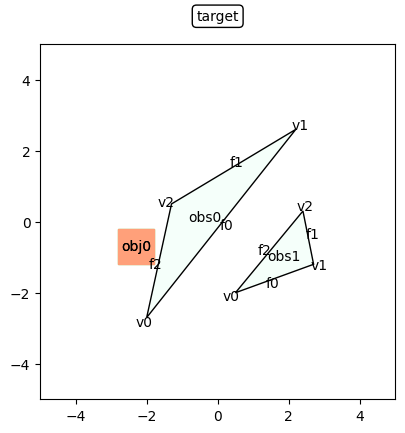

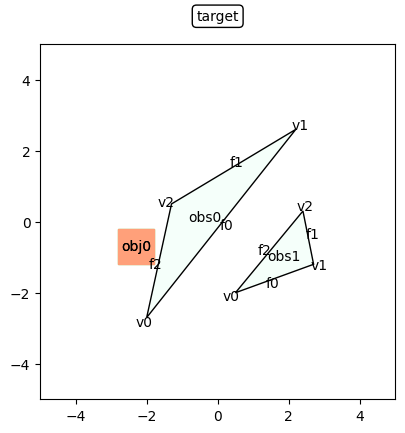

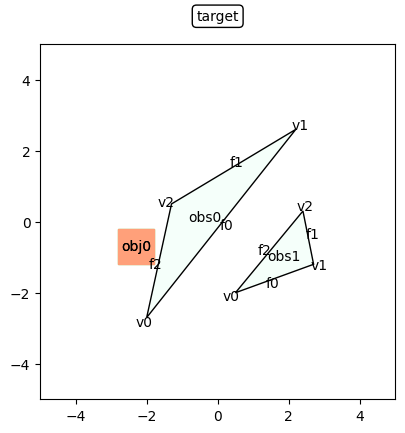

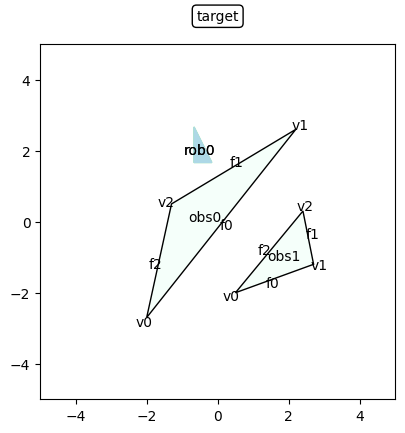

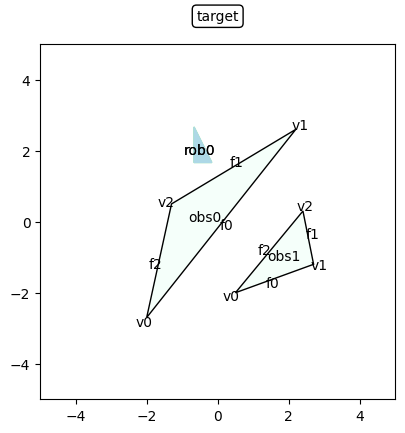

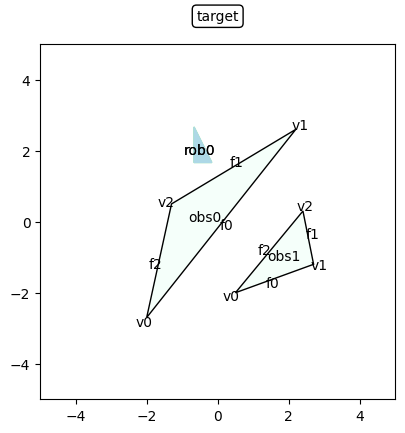

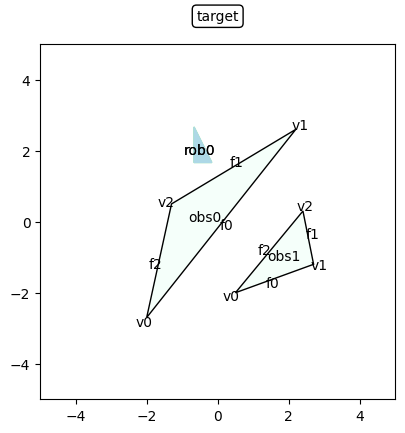

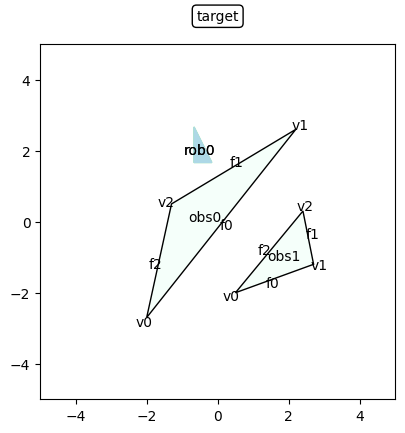

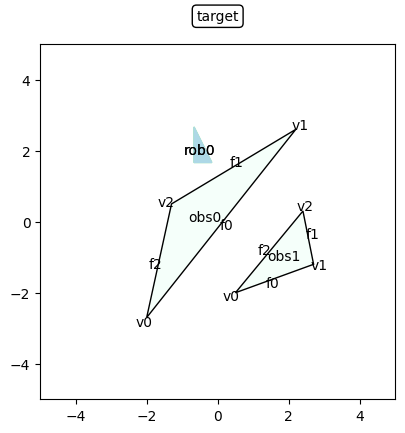

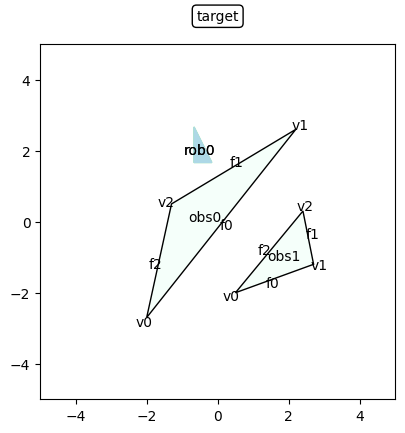

In [6]:
for g in cost_estimator._collision_free_graphs:
    for v in g.vertex_names:
        if v == "target":
            continue
        g.set_source(v)
        sol = g.solve()
        print(f"Reaching target from {v} succeeded: {sol.is_success}")
        anim = g.animate_solution()
        display(HTML(anim.to_html5_video()))

In [7]:
# cost_estimator = ShortcutEdgeCE(cg, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted)
# gcs_astar = GcsAstarConvexRestriction(
#     cg,
#     cost_estimator=cost_estimator,
#     should_reexplore=True,
# )
# sol = gcs_astar.run()